In [1]:
import pandas as pd

In [2]:
# select only healthy
df_val = pd.read_csv("../data/chestxpert/valid.csv")
df_train = pd.read_csv("../data/chestxpert/train.csv")

In [3]:
df_val.shape

(234, 19)

In [4]:
print(f"number of patients {df_train.shape[0]:,}")
print(f"healthy {df_train['No Finding'].sum():,}")

number of patients 223,414
healthy 22,381.0


In [4]:
df_train.describe()

,Age,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
count,223414.000000,22381.0,44839.000000,46203.000000,117778.000000,11944.000000,85956.000000,70622.000000,27608.000000,68443.000000,78934.000000,133211.000000,6492.000000,12194.000000,123217.000000
mean,60.430653,1.0,-0.035795,0.409346,0.848911,0.644508,0.456769,-0.183498,-0.461134,-0.005304,0.206540,0.559706,0.134011,0.688699,0.932680
std,17.820925,0.0,0.718442,0.769323,0.472571,0.691607,0.741785,0.753980,0.828249,0.990244,0.493529,0.648859,0.966183,0.565435,0.283377
min,0.000000,1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,1.0,-1.000000,0.000000,1.000000,1.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,1.000000
50%,62.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,74.000000,1.0,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,90.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
# drop all rows with -1 in any column
mask = (df_train[df_train == -1].sum(axis=1)==0)
df_certain = df_train[mask]

print(f"Removed uncertain cases: {df_certain.shape[0]:,}",)

Removed uncertain cases: 138,358


In [6]:
# only one problem detected
mask = df_certain[df_certain.columns[6:-1]].sum(axis=1)<2
df_one_target = df_certain[mask]

In [7]:
df_one_target[df_one_target.columns[5:-1]].sum(axis=0)

No Finding                    22271.0
Enlarged Cardiomediastinum     1520.0
Cardiomegaly                   2669.0
Lung Opacity                   4990.0
Lung Lesion                    1031.0
Edema                          5202.0
Consolidation                  1252.0
Pneumonia                       539.0
Atelectasis                    3118.0
Pneumothorax                   4468.0
Pleural Effusion               6091.0
Pleural Other                   395.0
Fracture                       1988.0
dtype: float64

In [8]:
# only frontal x-rays
df_one_target = df_one_target[df_one_target["Frontal/Lateral"] == "Frontal"]

In [17]:
df_one_target.columns[5:-1]

Index(['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly',
       'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia',
       'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other',
       'Fracture'],
      dtype='object')

In [20]:
df_one_target[df_one_target.columns[5:-1]].apply(lambda x: x[x==1].index.tolist(), axis=1).apply(len).value_counts()

1    44757
0     4166
Name: count, dtype: int64

In [39]:
df_one_target.shape

(9142, 2)

In [40]:
df_one_target.head()

,path,target
4,CheXpert-v1.0-small/train/patient00003/study1/...,0.0
24,CheXpert-v1.0-small/train/patient00011/study7/...,1.0
30,CheXpert-v1.0-small/train/patient00011/study8/...,1.0
108,CheXpert-v1.0-small/train/patient00036/study1/...,1.0
158,CheXpert-v1.0-small/train/patient00049/study3/...,0.0


test

In [58]:
df = pd.read_csv("../data/chestxpert/train.csv")

mask_frontal = (df["Frontal/Lateral"] == "Frontal")
mask_certain = (df[df == -1].sum(axis=1)==0)
df_1 = df[mask_frontal & mask_certain]

df_final = df_1[df_1[df_1.columns[5:-1]].sum(axis=1)==1]

In [61]:
df_final["target"] = df_final[df_final.columns[5:-1]].apply(lambda x: x[x==1].index.tolist()[0], axis=1)

/var/folders/lh/myds7z711nngnwhfjtgt0bxh0000gn/T/ipykernel_3867/281477365.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final["target"] = df_final[df_final.columns[5:-1]].apply(lambda x: x[x==1].index.tolist()[0], axis=1)


In [17]:
pd.read_csv("../data/chestxpert/train_sml_clean.csv").target.value_counts()

target
No Finding                    1938
Edema                          535
Pleural Effusion               506
Lung Opacity                   471
Pneumothorax                   429
Atelectasis                    298
Cardiomegaly                   225
Fracture                       165
Enlarged Cardiomediastinum     157
Consolidation                  141
Lung Lesion                     72
Pneumonia                       35
Pleural Other                   28
Name: count, dtype: int64

In [76]:
df = pd.read_pickle("../data/chestxpert/clusters.pkl")

In [77]:
df_group = df.groupby("label", as_index=False).cluster.value_counts()
df_agg = pd.merge(left=df_group,right=df.groupby("label").count().reset_index().rename(columns={"cluster": "sum"}), on="label") #.groupby("label").apply(lambda x: x/x.sum())
df_agg["norm"] = df_agg["count"]/df_agg["sum"]
df_count = df_agg.pivot(index="label", columns="cluster", values="norm").fillna(0)

In [83]:
import matplotlib.pyplot as plt

<Axes: xlabel='cluster', ylabel='label'>

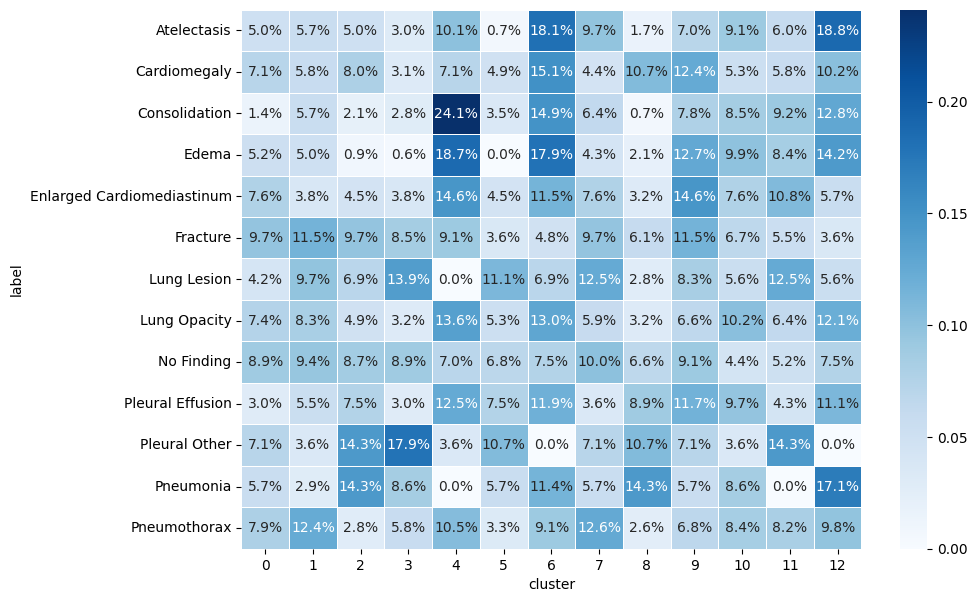

In [84]:
# heatmap with percentage values and space between cells and bigger figure
plt.figure(figsize=(10, 7))
sns.heatmap(df_count, annot=True, cmap="Blues", fmt=".1%", linewidths=.5)